In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("churn.csv", encoding_errors = 'ignore')

In [3]:
df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3328 non-null   object 
 1   Account Length  3325 non-null   float64
 2   Area Code       3325 non-null   float64
 3   Phone           3325 non-null   object 
 4   Int'l Plan      3325 non-null   object 
 5   VMail Plan      3325 non-null   object 
 6   VMail Message   3325 non-null   float64
 7   Day Mins        3324 non-null   float64
 8   Day Calls       3324 non-null   float64
 9   Day Charge      3324 non-null   object 
 10  Eve Mins        3324 non-null   object 
 11  Eve Calls       3324 non-null   object 
 12  Eve Charge      3324 non-null   float64
 13  Night Mins      3324 non-null   float64
 14  Night Calls     3324 non-null   object 
 15  Night Charge    3323 non-null   object 
 16  Intl Mins       3323 non-null   float64
 17  Intl Calls      3323 non-null   f

In [5]:
#Dropping unncessary columns
df.drop(df.iloc[:,21:], inplace = True, axis = 1)

In [6]:
df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False.
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False.
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False.
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.9,...,88,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False.
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122,12.61,186.9,121,8.41,10.1,3.0,2.73,3,False.


# Data Cleaning

Some columns have object data type even though they should float or integer.

We will convert them to numeric, and if they are non numeric they will be replaced as NaN

In [10]:
df["State"].value_counts()

State
WV                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         106
NY                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          83
MN                                  

As we can see here there are some garbage values present in state column, lets locate and remove these values.


As we can see all the state values are 2 letters, so lets remove the garbage values which are more than 2 letters

In [13]:
df[df["State"].str.len() > 2]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1620,"Qu1z[LʡxN\r.,6 MK)6rNUW*YqOIw1u6S{i֭Ye<...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1621,@ƇވܙK9P*'?;'H7m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1622,Yv_YuN?Ø߀Ъ!7!m{ӧHݻ41nA+9d̓#s|1[Nj{Hf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1623,<nD5,224.0,102.0,38.08,192,99,16.32,163.1,100.0,7.34,...,2,2.59,0.0,False.,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Dropping garbage values
df.drop(index = df.index[1620:1624], inplace = True)

In [15]:
df["Int\'l Plan"].value_counts()

Int'l Plan
no     3000
yes     323
n/        1
Name: count, dtype: int64

In [16]:
df[df["Int'l Plan"] == "n/"]
df.drop(index = 1611, inplace = True)

In [17]:
df["VMail Plan"].value_counts()
#Here yeS is same as yes so lets edit that
df[df["VMail Plan"] == "yeS"]
df.loc[1610,"VMail Plan"] = 'yes'

In [18]:
#Checking other numeric columns
cols = df.columns.drop(["State","Churn?","Int'l Plan","VMail Plan","Phone"])

In [19]:
cols

Index(['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

In [20]:
df[cols] = df[cols].apply(pd.to_numeric, errors = "coerce")

In [21]:
df["Churn?"].dropna(inplace = True)

There is some garbage values in Churn? lets solve it 

In [23]:
df["Churn?"].value_counts()

Churn?
False.    2836
True.      482
57           1
Falsό        1
8.49         1
Name: count, dtype: int64

In [24]:
df[(df["Churn?"] == "57") | (df["Churn?"] == "8.49") | (df["Churn?"] == "Falsό")]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1608,OR,163.0,408.0,346-3445,no,yes,25.0,219.6,99.0,37.33,...,99.0,17.88,242.7,88.00,10.92,13.8,8.00,3.73,NaN,57
1609,RI,104.0,408.0,382-3966,yes,no,0.0,160.4,73.0,27.27,...,103.0,24.98,306.6,90.00,13.80,12.6,5.00,3.40,4.0,Falsό
1740,RI,134.0,415.0,413-1789,no,no,0.0,141.7,95.0,NaN,...,0.0,226.70,94.0,38.54,168.40,129.0,14.31,188.70,117.0,8.49


In [25]:
df.drop([1608,1609,1740],inplace = True)


In [26]:
df["Churn?"].value_counts()

Churn?
False.    2836
True.      482
Name: count, dtype: int64

In [27]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          1
Day Calls         1
Day Charge        1
Eve Mins          1
Eve Calls         2
Eve Charge        1
Night Mins        1
Night Calls       1
Night Charge      2
Intl Mins         1
Intl Calls        1
Intl Charge       1
CustServ Calls    2
Churn?            2
dtype: int64

In [28]:
df.dropna(inplace = True)

# Finding relationship between the variables

As you can see this is an unbalanced dataset 

In [31]:
df['Churn?'].value_counts()

Churn?
False.    2835
True.      482
Name: count, dtype: int64

to find predicting power of each variable we can use weight of evidence 


In [33]:
import warnings
df["Churn?"].replace('True.',1, inplace = True)
df["Churn?"].replace('False.',0, inplace = True)
warnings.filterwarnings('ignore')

C:\Users\Het\AppData\Local\Temp\ipykernel_9720\1173306041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churn?"].replace('True.',1, inplace = True)
C:\Users\Het\AppData\Local\Temp\ipykernel_9720\1173306041.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [34]:
import warnings
warnings.filterwarnings('ignore')
df["Int'l Plan"].replace('no',0, inplace = True)
df["Int'l Plan"].replace('yes',1, inplace = True)
df["VMail Plan"].replace('yes',1, inplace = True)
df["VMail Plan"].replace('no',0, inplace = True)




In [36]:
from scipy.stats import chi2_contingency
# Creating a cross-tabulation table of churn vs state
churn_state_ct = pd.crosstab(df['State'], df['Churn?'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(churn_state_ct)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'P-value: {p}')


Chi-Square Test Statistic: 80.61227779548527
P-value: 0.0039274488185565915


In [37]:
#There is a relationship between state and churn therefore we will use one hot encoding for state

In [38]:
conti_columns = df.columns.drop(["State",'Phone',"Churn?","Day Charge","Night Charge", "Intl Charge"])

In [39]:
conti_columns

Index(['Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls',
       'CustServ Calls'],
      dtype='object')

In [40]:
#Whats left to do, Graph, weight of evidence, Modelling

In [41]:
df_conti = pd.DataFrame(df, columns = conti_columns)

<Axes: >

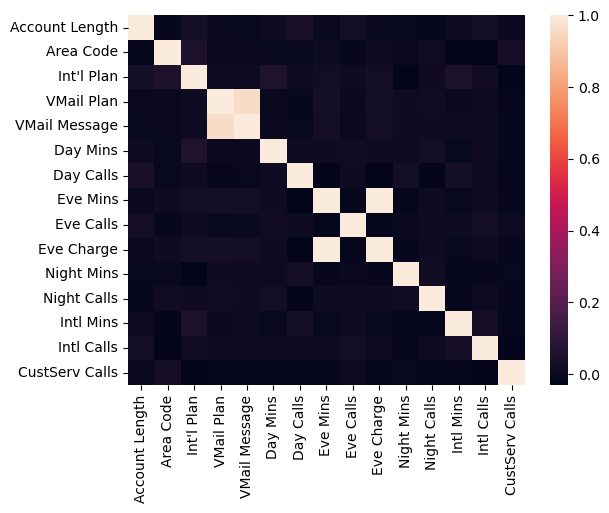

In [42]:
df_conti.corr()
import seaborn as sns
sns.heatmap(df_conti.corr())

Here we can see multicolineriaty, among some terms.

Statistical analysis 

In [45]:
churn_group = df[df["Churn?"] == 1]
non_churn_group = df[df["Churn?"] == 0]

In [46]:
import statsmodels.api as sm 
logit_backward = sm.Logit(y_train,X_train)
result = logit_backward.fit()
print(result.summary())


NameError: name 'y_train' is not defined

# Baseline Models

In [67]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [69]:
baseline_feature_cols = df.columns.drop(['State','Phone',"Churn?"])

In [71]:
df["Churn?"] = pd.to_numeric(df["Churn?"])
X = df[baseline_feature_cols]
y = df["Churn?"]

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 1)

## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [80]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix


array([[840,  12],
       [135,   9]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

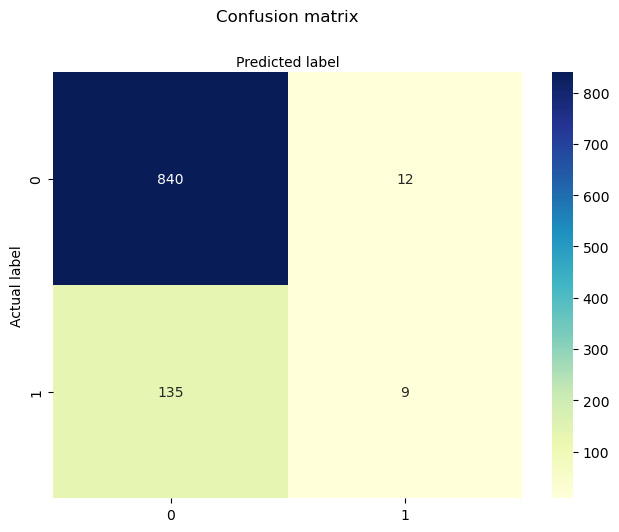

In [82]:
# import required modules
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [84]:
print("Accuracy-",metrics.accuracy_score(y_pred,y_test))
print("Precision-",metrics.precision_score(y_pred,y_test))
print("Recall-",metrics.recall_score(y_pred,y_test))

Accuracy- 0.8524096385542169
Precision- 0.0625
Recall- 0.42857142857142855


## Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [89]:
print("Accuracy-",metrics.accuracy_score(y_pred,y_test))
print("Precision-",metrics.precision_score(y_pred,y_test))
print("Recall-",metrics.recall_score(y_pred,y_test))

Accuracy- 0.9176706827309237
Precision- 0.7222222222222222
Recall- 0.7123287671232876


## Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
y_pred = rf.predict(X_test)

In [96]:
print("Accuracy-",metrics.accuracy_score(y_pred,y_test))
print("Precision-",metrics.precision_score(y_pred,y_test))
print("Recall-",metrics.recall_score(y_pred,y_test))

Accuracy- 0.9558232931726908
Precision- 0.7430555555555556
Recall- 0.9385964912280702


In [100]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
cnf_matrix

array([[845,  37],
       [  7, 107]], dtype=int64)

#I want to make new features such as Day Mins per call, NIght Mins per call , Int'l mins per call

# Processing 

As charge is derieved from mins(ex. day mins * rate = day_charge), we should remove charges column

In [149]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [151]:
df_improved = df.drop(["Day Charge","Eve Charge","Night Charge","Intl Charge"],axis = 1)

In [153]:
df_improved.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,KS,128.00,415.00,382-4657,0,1,25.00,265.10,110.00,197.40,99.00,244.70,91.00,10.00,3.00,1.00,0
1,OH,107.00,415.00,371-7191,0,1,26.00,161.60,123.00,195.50,103.00,254.40,103.00,13.70,3.00,1.00,0
2,NJ,137.00,415.00,358-1921,0,0,0.00,243.40,114.00,121.20,110.00,162.60,104.00,12.20,5.00,0.00,0
3,OH,84.00,408.00,375-9999,1,0,0.00,299.40,71.00,61.90,88.00,196.90,89.00,6.60,7.00,2.00,0
4,OK,75.00,415.00,330-6626,1,0,0.00,166.70,113.00,148.30,122.00,186.90,121.00,10.10,3.00,3.00,0


In [155]:
#We can see that the understand columns are highly correlated, so we will calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.float_format', '{:.2f}'.format)

X = df_improved[["Account Length","Day Mins", 'Day Calls', 'Eve Mins','Eve Calls','Night Mins','Night Calls','Intl Mins', 'Intl Calls',
       'CustServ Calls',"Int'l Plan",'VMail Plan','VMail Message']]  
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


           feature   VIF
0   Account Length  7.19
1         Day Mins 11.16
2        Day Calls 21.74
3         Eve Mins 14.69
4        Eve Calls 21.93
5       Night Mins 15.03
6      Night Calls 22.29
7        Intl Mins 13.19
8       Intl Calls  4.25
9   CustServ Calls  2.38
10      Int'l Plan  1.12
11      VMail Plan 16.39
12   VMail Message 16.01


As we see that the day mins and day calls are highly correlated columns and similarly, night, eve, and Intl we have to only keep one column. We have to check IV of each and then we can decide what to drop 

In [158]:
df_improved.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins',
       'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [160]:
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
feature_cols = ["Day Mins",'Day Calls',"Eve Mins","Eve Calls","Night Mins","Night Calls","Intl Mins","Intl Calls","Account Length"]
X = df_improved[feature_cols]
y = df_improved["Churn?"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
logit_backward = sm.Logit(y_train,X_train)
result = logit_backward.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.398174
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Churn?   No. Observations:                 2321
Model:                          Logit   Df Residuals:                     2312
Method:                           MLE   Df Model:                            8
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                 0.04065
Time:                        14:31:06   Log-Likelihood:                -924.16
converged:                       True   LL-Null:                       -963.33
Covariance Type:            nonrobust   LLR p-value:                 1.061e-13
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Day Mins           0.0088      0.001      7.910      0.000       0.007       0.011
Day Calls        

From this result eve mins, night_mins, Intl mins have p-value larger than 0.05 so we would remove that columns

In [119]:
df_improved.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins',
       'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [121]:
cat_cols = df_improved.columns.drop(['Account Length', 'Phone', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Calls',
       'Night Calls', 'Intl Calls', 'CustServ Calls', 'Churn?',"Eve Mins","Night Mins","Intl Mins"])

In [123]:
conti_cols = df_improved.columns.drop(['State', 'Area Code', "Int'l Plan", 'VMail Plan','Phone',"Churn?"])

### Weight of Evidence

In [165]:
import numpy as np
import pandas as pd

# Function to calculate WoE and IV for a given feature (continuous or categorical)
def calculate_woe_iv(data, feature, target, bins=10, method='quantile', is_continuous=True):
    if is_continuous:
        # Binning the continuous variable
        if method == 'quantile':
            data['binned'] = pd.qcut(data[feature], bins, duplicates='drop')
        else:
            data['binned'] = pd.cut(data[feature], bins)
    else:
        # For categorical variables, use the feature directly
        data['binned'] = data[feature]

    # Creating a summary table
    summary = data.groupby('binned').agg({target: ['count', 'sum']})
    summary.columns = ['total', 'events']
    summary['non_events'] = summary['total'] - summary['events']
    
    # Calculate WoE and IV
    summary['event_rate'] = summary['events'] / summary['events'].sum()
    summary['non_event_rate'] = summary['non_events'] / summary['non_events'].sum()
    
    # Avoid division by zero issues
    summary['woe'] = np.log((summary['event_rate'] + 0.0001) / (summary['non_event_rate'] + 0.0001))
    summary['iv'] = (summary['event_rate'] - summary['non_event_rate']) * summary['woe']
    
    # Information Value for the feature
    iv = summary['iv'].sum()
    
    return summary, iv

# Categorical: 'VMail Plan' (Yes/No)
#woe_summary_vmail_plan, iv_vmail_plan = calculate_woe_iv(df, 'VMail Plan', 'Churn?', is_continuous=False)
#print(f"Information Value (IV) for VMail Plan: {iv_vmail_plan}")


In [167]:
for col in cat_cols:
    woe_summary_col, iv_col = calculate_woe_iv(df_improved,col, 'Churn?', is_continuous=False)
    print(f"Information Value (IV) for {col}: {iv_col}")



Information Value (IV) for State: 0.20025402525973238
Information Value (IV) for Area Code: 0.00045672289642484506
Information Value (IV) for Int'l Plan: 0.38040256810757445
Information Value (IV) for VMail Plan: 0.09617966841107672


In [169]:
for col in conti_cols:
    woe_summary_col, iv_col = calculate_woe_iv(df_improved,col, 'Churn?', is_continuous=True)
    print(f"IV for {col} is {iv_col}")


IV for Account Length is 0.017275533497357897
IV for VMail Message is 0.027112799233474885
IV for Day Mins is 0.7000567385535761
IV for Day Calls is 0.02626455387997179
IV for Eve Mins is 0.09140338354340079
IV for Eve Calls is 0.006010717814418344
IV for Night Mins is 0.029260201755706632
IV for Night Calls is 0.022742945344018037
IV for Intl Mins is 0.06263827914251463
IV for Intl Calls is 0.06768194775196987
IV for CustServ Calls is 0.516489267935963


from above IV and p-value from logistic regression we decide to drop Eve mins, night mins and intl mins

In [171]:
df_improved = df_improved.drop(["Eve Mins","Night Mins","Intl Mins","binned","Account Length"],axis = 1)


In [173]:
df_improved.columns

Index(['State', 'Area Code', 'Phone', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Eve Calls', 'Night Calls',
       'Intl Calls', 'CustServ Calls', 'Churn?'],
      dtype='object')

### Logistic Regression on Improved df

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
improved_feature_cols = ["Area Code","Int'l Plan","Day Calls","Eve Calls","Day Mins","Day Calls",'Eve Calls', 'Night Calls',
       'Intl Calls', 'CustServ Calls']
X = df_improved[improved_feature_cols]
y = df_improved["Churn?"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
model = sm.Logit(y_train,X_train)
result = model.fit()
print(result.summary())
print(f"Precision {metrics.precision_score(y_pred,y_test)}")
print(f"Recall {metrics.recall_score(y_pred,y_test)}")
print(f"Accuracy {metrics.accuracy_score(y_pred,y_test)}")


Optimization terminated successfully.
         Current function value: 0.341247
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Churn?   No. Observations:                 2653
Model:                          Logit   Df Residuals:                     2645
Method:                           MLE   Df Model:                            7
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                  0.1679
Time:                        15:24:20   Log-Likelihood:                -905.33
converged:                       True   LL-Null:                       -1088.0
Covariance Type:            nonrobust   LLR p-value:                 6.150e-75
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Area Code         -0.0068      0.006     -1.155      0.248      -0.018       0.005
Int'l Plan       

### Random Forest 

In [208]:
from sklearn.ensemble import RandomForestClassifier
rdforest = RandomForestClassifier()
rdforest.fit(X_train,y_train)
y_pred = rdforest.predict(X_test)
print(f"Precision {metrics.precision_score(y_pred,y_test)}")
print(f"Recall {metrics.recall_score(y_pred,y_test)}")
print(f"Accuracy {metrics.accuracy_score(y_pred,y_test)}")


Precision 0.47572815533980584
Recall 0.7777777777777778
Accuracy 0.8975903614457831


In [216]:
importances = rdforest.feature_importances_

# Create a DataFrame to display feature importance with corresponding feature names
feature_importance_df = pd.DataFrame({
    'Feature': improved_feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)


          Feature  Importance
4        Day Mins        0.26
9  CustServ Calls        0.15
8      Intl Calls        0.09
7     Night Calls        0.09
1      Int'l Plan        0.09
5       Day Calls        0.08
2       Day Calls        0.08
6       Eve Calls        0.07
3       Eve Calls        0.07
0       Area Code        0.03
